### 공기의 질을 측정한 데이터
1. airquanlity 데이터에 대해서 결측치가 가장 많은 변수를 찾아서 해당 결측치를 0으로 대체하고 결측치를 제외한 평균과 0으로 대치한 후 평균의 차이를 구하시오
2. wind 변수에 대해서 Min-Max 정규화를 수행 한 후 평균 값과 Z 정규화를 수행 한 후 평균 값의 차이를 구하시오
3. 월별 평균 기온을 구하시오

In [1]:
import pandas as pd
import numpy as np

In [18]:
# 데이터 로드
air = pd.read_csv("./data/airquality.csv")
air.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


In [19]:
# 결측치 확인
air.isna().sum()

Ozone      37
Solar.R     7
Wind        0
Temp        0
Month       0
Day         0
dtype: int64

In [20]:
# 결측치 제외한 평균
air_mean = air['Ozone'].mean()

In [21]:
# 결측치 많은 변수 Ozone의 해당 결측치 0으로 대체
air['Ozone'] = air['Ozone'].fillna(0)

In [22]:
air.isna().sum()

Ozone      0
Solar.R    7
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

In [23]:
air_0_mean = air['Ozone'].mean()

In [24]:
# 결측치 대치 전과 후의 평균 차이
air_mean - air_0_mean

10.188133874239352

In [39]:
air1 = air.copy()

In [46]:
air2 = air.copy()

In [28]:
# wind 컬럼의 원래 평균
air['Wind'].mean()

9.957516339869281

In [52]:
from sklearn.preprocessing import MinMaxScaler

Mmscaler = MinMaxScaler()

air1['Wind'] = Mmscaler.fit_transform(air1['Wind'].values.reshape(-1, 1))

air1['Wind'].mean()


0.4346061231510148

In [53]:
from sklearn.preprocessing import StandardScaler

Stdscaler = StandardScaler()

air2['Wind'] = Stdscaler.fit_transform(air2['Wind'].values.reshape(-1, 1))

air2['Wind'].mean()

-2.322035084183334e-17

In [54]:
# MinMax 정규화와 Standard 정규화 평균값 차이
air1['Wind'].mean() - air2['Wind'].mean()

0.4346061231510148

In [55]:
# 월별 평균 기온 구하기
air[['Temp', 'Month']].groupby(['Month']).mean()

,Temp
Month,
5,65.548387
6,79.100000
7,83.903226
8,83.967742
9,76.900000


### 근무자 정보를 측정한 데이터
1. Attrition은 퇴사 여부 데이터를 (yes:1, no:0)으로 데이터를 변환하여 새로운 파생변수에 대입하고 범주별 레코드 수를 계산하시오
2. 범주형 변수 중 유일한 값을 1개만 가지고 있는 컬럼을 찾아내어 그 컬럼을 데이터에서 제거하시오
3. 원래 데이터에서 숫자형인 컬럼만 추출하여 새로운 데이터프레임으로 생성하고, 각 변수간의 상관계수(피어슨 상관계수)를 구하시오

In [56]:
import pandas as pd
import numpy as np

In [58]:
att = pd.read_csv('./data/HR-Employee-Attrition.csv')
att.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [59]:
mapping = {
    'Yes' : 1,
    'No' : 0
}
att['attrition_1'] = att['Attrition'].map(mapping)

In [61]:
att['attrition_1'].value_counts()

attrition_1
0    1233
1     237
Name: count, dtype: int64

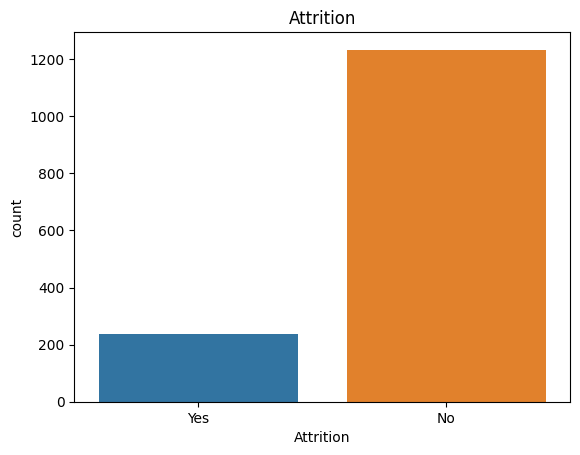

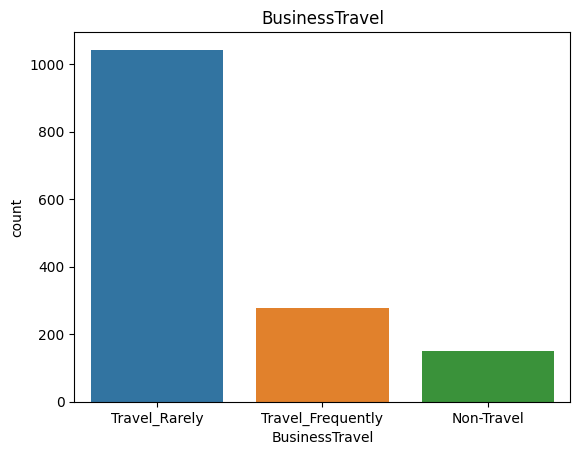

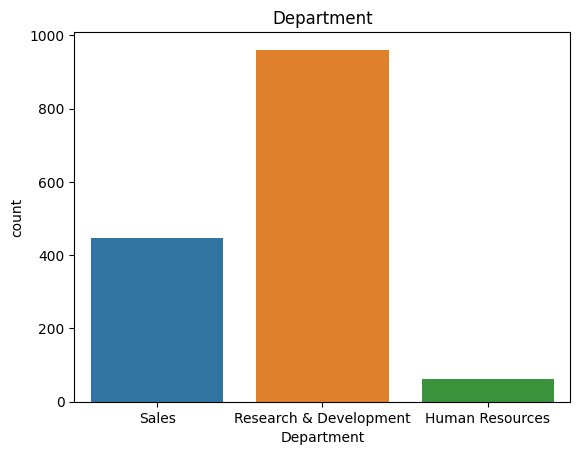

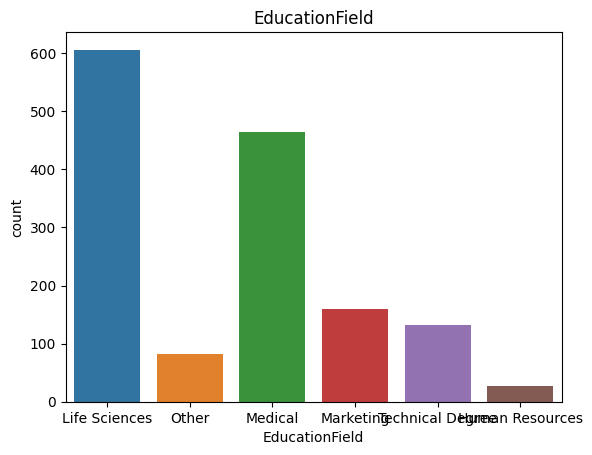

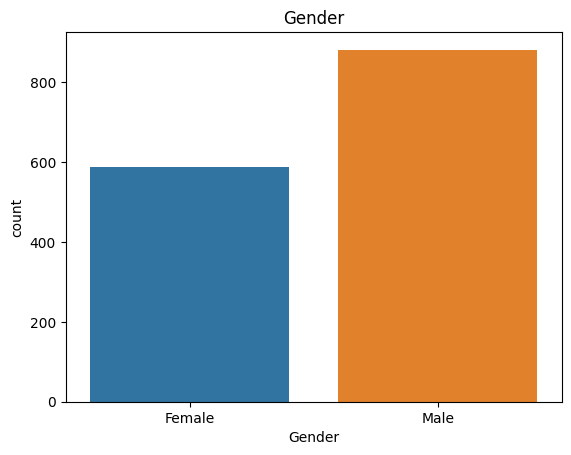

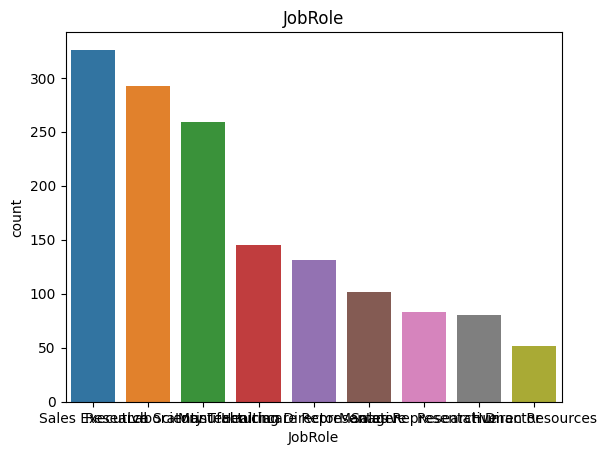

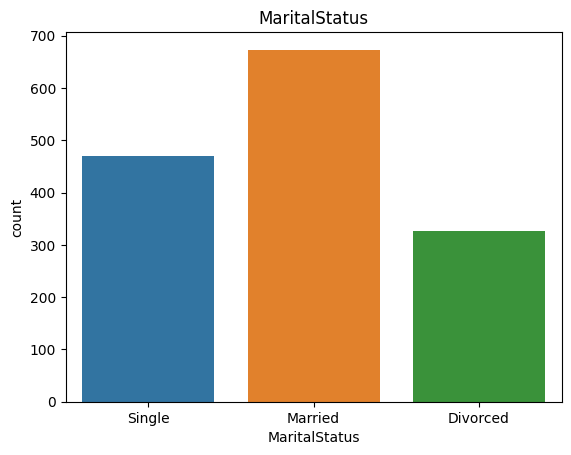

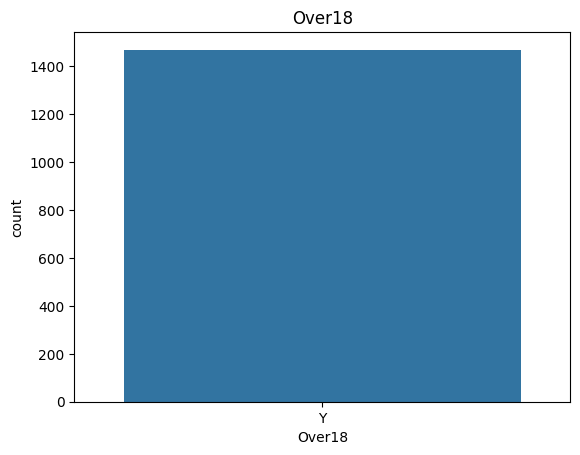

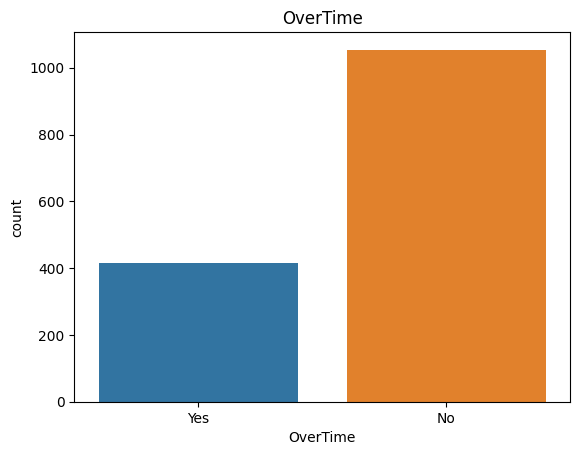

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

new_columns = att.select_dtypes(include = 'object').columns

for i in new_columns:
    plt.figure()
    sns.countplot(data = att, x = i)
    plt.title(i)
    plt.show()

In [69]:
# 컬럼 제거
att.drop(['Over18'], axis = 1, inplace = True)

In [77]:
# 숫자형 컬럼만 추출 후 새로운 데이터 프레임 생성
new_df = pd.DataFrame(att.select_dtypes(exclude = 'object'))

In [79]:
new_df.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,attrition_1
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089,-0.159205
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363,-0.056652
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406,0.077924
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065,-0.031373
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197,-0.010577
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999,-0.103369
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123,-0.006846
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976,-0.130016
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281,-0.169105
